## Introduction 

The intention of this notebook is tp perform EDA on student performance dataset in order to undersrand the trends in dataset


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


 ### 1.Import CSV Data as Pandas DataFrame

In [55]:
df=pd.read_csv("data/stud.csv")

### 2.1 Show Top 5 Records

In [56]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Shape of the dataset

In [57]:
df.shape

(1000, 8)

## 2.3 Data Types of colums

In [58]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### 2.4 Unique Values

##### Show unique values in categorical columns


In [59]:
# get all categorical columns and numerical columns
categorical_column_names=[column_name for column_name in df.columns if df[column_name].dtype=='O']
numerical_column_names=[column_name for column_name in df.columns if df[column_name].dtype!='O']


In [60]:
# Display unique values
for column_name in categorical_column_names:
   print(f"{column_name}: {df[column_name].unique()}")

gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


### 2.5 Dataset Information
- Gender :sex of students -> (Male/Female)
- Race/ethinicity : ethinicity of students ->(Group A,B,C,D,E)
- parental level of education : patents' final education ->(bachelor's degree, some college,master's degree,associate's degree,high schoolsome high school)
- lunch : having lunch before test ('standard' 'free/reduced')
- test_preparation_course :('none' 'completed')
- Maths score
- reading score
- writing score


### 3. Data Check to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values in each column
- Check stasticts of dataset


### 3.1 Checking Missing Values

In [61]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no duplicate values  in dataset 

### 3.2 Check Duplicates
df.duplicated().sum()

### 3.3 Check data type

In [62]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### 3.4 Check the number of unique values in each column

In [63]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Stastics of Dataset

In [64]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 4. Transforming Dataset

- Adding columns for "Total_Score" and "Average_Score"
   - total score : we are going to take sum of the three scores availble and creating total score. This will be our dependent variable for predictive model
   - Average_score : This will be the average of three  scores

In [65]:
df["total_score"]=df.math_score+df.reading_score+df.writing_score
df["average_score"]=df.total_score/3

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 5.Exploring Datasets

In [67]:
## Lets explore the dataset
## Get the count of students who has full score each of the tests
reading_full=df[df['reading_score']==100]['reading_score'].count()
writing_full=df[df['writing_score']==100]['writing_score'].count()
math_full=df[df['math_score']==100]['math_score'].count()

print(f'number of sutdents with full score in math: {math_full}')
print(f'number of sutdents with full score in reading: {reading_full}')
print(f'number of sutdents with full score in writing: {writing_full}')


number of sutdents with full score in math: 7
number of sutdents with full score in reading: 17
number of sutdents with full score in writing: 14


In [68]:
## Get number of students who scored less than 20 in each of the tests

reading_less_20 =df[df["reading_score"]<=20].reading_score.count()
writing_less_20=df[df["writing_score"]<=20].writing_score.count()
math_less_20=df[df["math_score"]<=20].math_score.count()

print(f'number of sutdents with full score in math: {math_less_20}')
print(f'number of sutdents with full score in reading: {reading_less_20}')
print(f'number of sutdents with full score in writing: {writing_less_20}')


number of sutdents with full score in math: 4
number of sutdents with full score in reading: 1
number of sutdents with full score in writing: 3


##### From above calculations we can see that students have performed best in reading and worst in maths


### 5.1 Visualze average score to make some conclusion
- Histogram
- Keranl Distribution function(KDE)

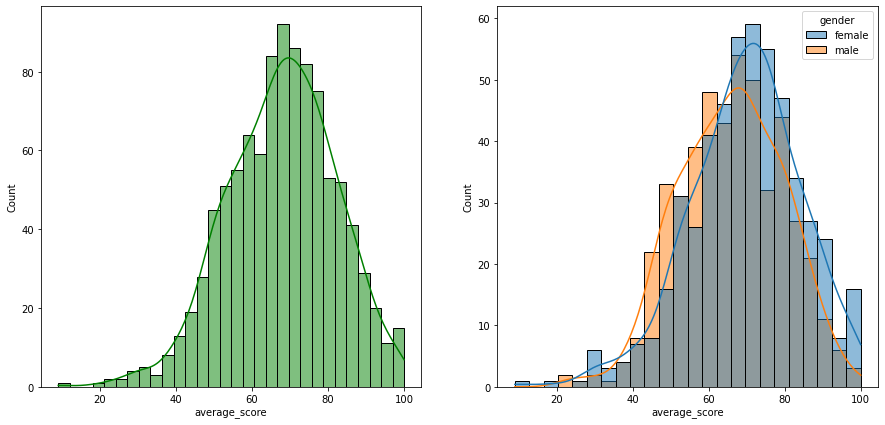

In [69]:
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


##### Insight : Feamale students tends to perform well than male students

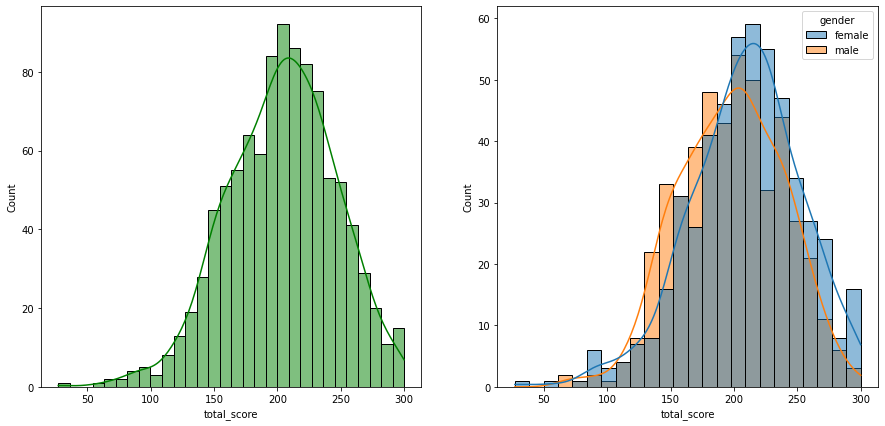

In [70]:
# Lets check the distribution w.r.t total score
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()


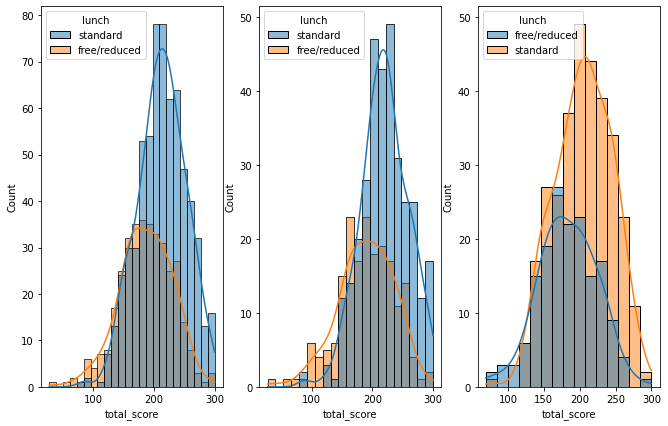

In [71]:
# Lets check the total_score distributiontotal w.r.t lunch
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='lunch')



plt.show()

#### Insights :
 - Standard lunch helps studemts to perform well
 - Lunch affects the male and female students same way

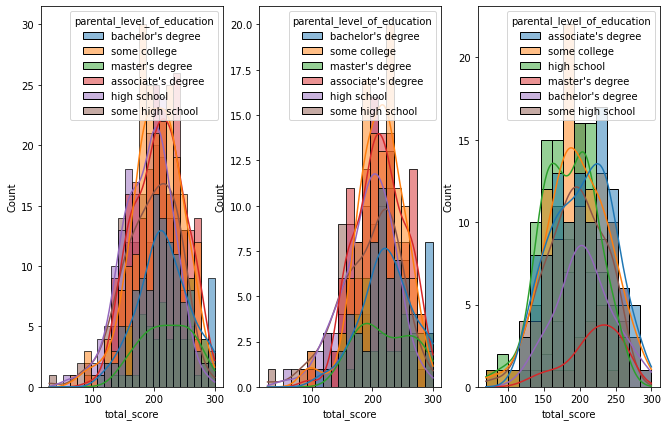

In [72]:
# Lets check the total_score distributiontotal w.r.t parental lvel of education
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='parental_level_of_education')



plt.show()

#### Insight : Parental level of education is not affection the students scores

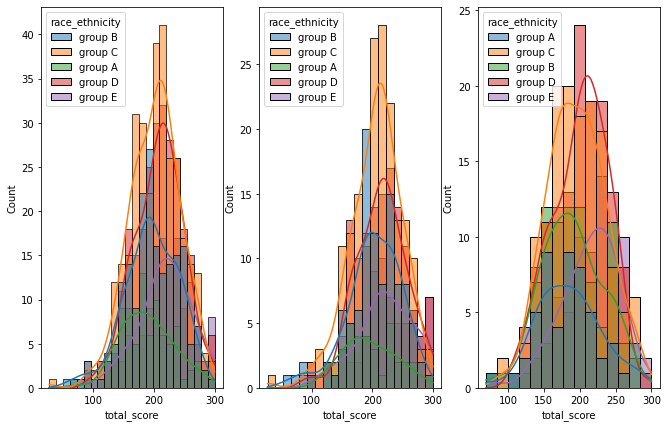

In [73]:
# Lets check the total_score distributiontotal w.r.t ethinicity
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='race_ethnicity')



plt.show()

#### Insights: Students from ethinicity group A and B has poor perfance compared students from group C,D, and E

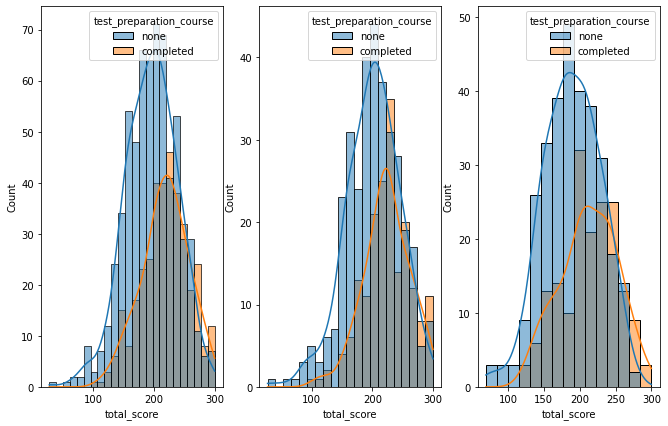

In [108]:
# Lets check the total_score distributiontotal w.r.t est_preparation_course
fig,axs =plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='total_score',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='total_score',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='total_score',kde=True,hue='test_preparation_course')



plt.show()

#### Insight : Test prepation is not helping students to get high scores

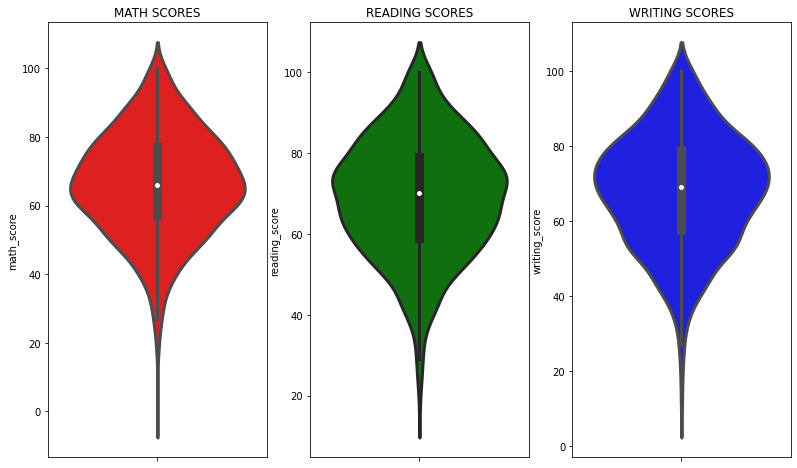

In [92]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights: From  the plot its clear that most of the sutendents

### 5.2 Multivariate Analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

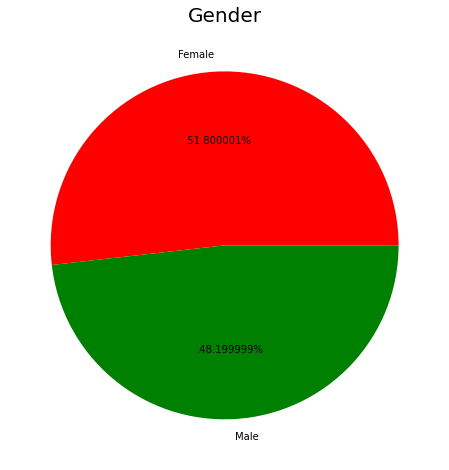

In [94]:
### Overall gender counts
plt.rcParams['figure.figsize']=(10,8)

size=df['gender'].value_counts()
labels='Female','Male'
color =['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#### Insight :. We have almost same number of males and females in given data

(-1.25, 1.25, -1.25, 1.25)

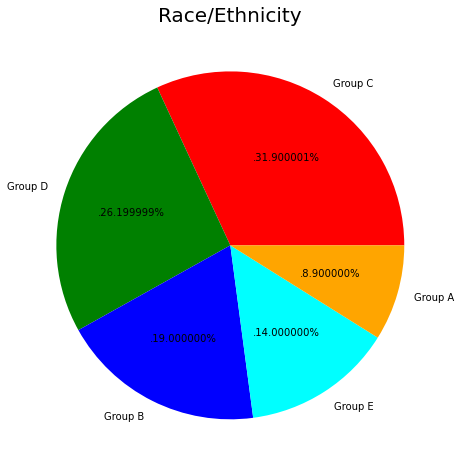

In [95]:

size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

#### Insight: Ethinicity Group C  has highest number students and ethinicity group A has lowest nuber students

(-1.25, 1.25, -1.25, 1.25)

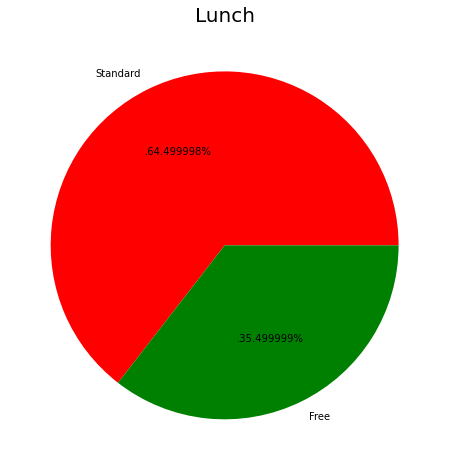

In [96]:

size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


### Insight: Overall 64% of the students takes standard Lunch and rest takes free lunch

(-1.25, 1.25, -1.25, 1.25)

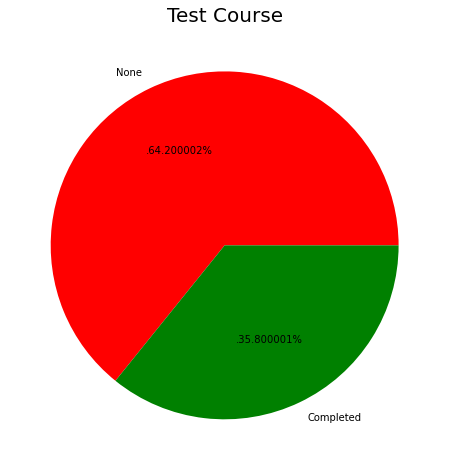

In [97]:

size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

### Insight: Overall 64% of the students completed test prepatation course 

(-1.25, 1.25, -1.25, 1.25)

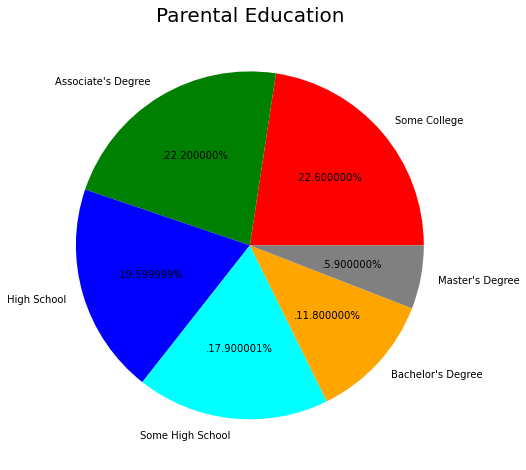

In [99]:
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

#### Insight :Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Outlier Analysis

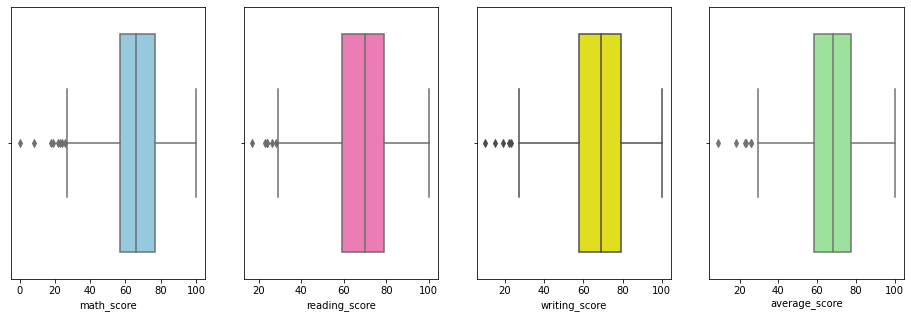

In [104]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

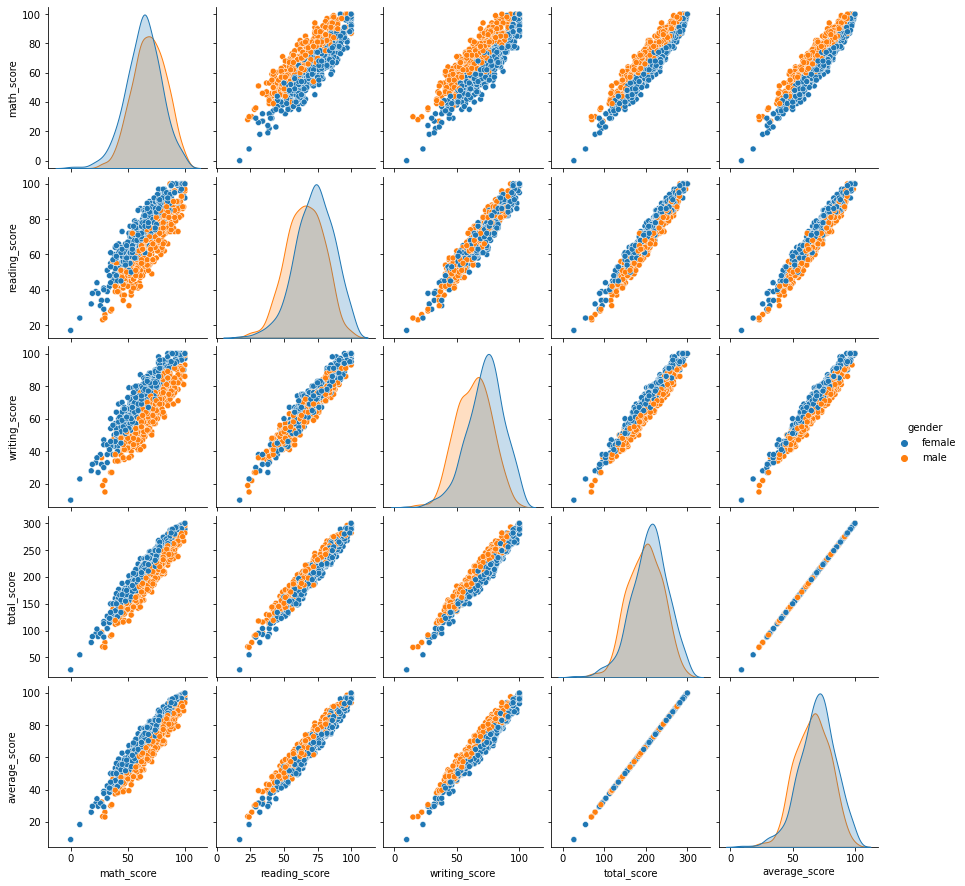

In [106]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Conclusion :
1. The performance of female students is slightly better compared to male
2. Stanard lunch helps students
3. Different Ethinicity group has different performance 
4. Student's Performance is not much related with test preparation course